In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Import data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/hmeq.csv', header = 0)
df.sample(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
950,0,9100,47756.0,84022.0,HomeImp,Other,18.0,0.0,0.0,206.797361,1.0,17.0,32.391146
5749,0,43300,119351.0,179347.0,DebtCon,Self,13.0,0.0,0.0,178.951539,0.0,4.0,37.980464
5855,0,51600,38900.0,63292.0,DebtCon,Office,6.0,1.0,NaN,182.520896,1.0,15.0,32.823121
3955,0,20700,NaN,64980.0,HomeImp,Office,6.0,0.0,0.0,112.635860,1.0,5.0,17.693144
5296,0,29200,139299.0,180818.0,DebtCon,ProfExe,1.0,0.0,0.0,226.861145,1.0,19.0,40.817309
3579,0,18800,66562.0,90325.0,DebtCon,Other,0.0,1.0,1.0,112.903262,2.0,25.0,33.162271
4594,1,24000,136000.0,NaN,DebtCon,ProfExe,3.0,1.0,6.0,303.294286,1.0,27.0,NaN
2642,0,15100,127045.0,163833.0,DebtCon,Office,4.0,0.0,0.0,135.975277,0.0,21.0,25.861812
1050,0,9600,45240.0,60136.0,DebtCon,Other,2.0,0.0,1.0,83.066751,0.0,19.0,38.454300
1818,0,12300,48866.0,73023.0,HomeImp,Office,11.0,3.0,1.0,251.629062,1.0,29.0,32.876871


**DESCRIPTIONS:**


BAD: 1 = client defaulted on loan 0 = loan repaid

LOAN: Amount of the loan request

MORTDUE: Amount due on existing mortgage

VALUE: Value of current property

REASON: DebtCon = debt consolidation; HomeImp = home improvement

JOB: Six occupational categories

YOJ: Years at present job

DEROG: Number of major derogatory reports

DELINQ: Number of delinquent credit lines

CLAGE: Age of oldest trade line in months

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BAD          5960 non-null   string 
 1   LOAN         5960 non-null   int64  
 2   MORTDUE      5960 non-null   float64
 3   VALUE        5960 non-null   float64
 4   REASON       5960 non-null   object 
 5   JOB          5960 non-null   object 
 6   YOJ          5960 non-null   float64
 7   DEROG        5960 non-null   float64
 8   DELINQ       5960 non-null   float64
 9   CLAGE        5960 non-null   float64
 10  NINQ         5960 non-null   float64
 11  CLNO         5960 non-null   float64
 12  DEBTINC      5960 non-null   float64
 13  LOAN_WOE     5960 non-null   float64
 14  MORTDUE_WOE  5960 non-null   float64
 15  VALUE_WOE    5960 non-null   float64
 16  YOJ_WOE      5960 non-null   float64
 17  CLAGE_WOE    5960 non-null   float64
 18  NINQ_WOE     5960 non-null   float64
 19  CLNO_W

In [ ]:
#Check null
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
#Replace data
columns_num = df.select_dtypes(['float', 'int']).columns
df[columns_num] = df[columns_num].apply(lambda x: x.fillna(x.mean()), axis=0)

columns_obj = df.select_dtypes(['object']).columns
df[columns_obj] = df[columns_obj].apply(lambda x: x.fillna('Missing'), axis=0)

df[['BAD']] = df[['BAD']].astype('string')


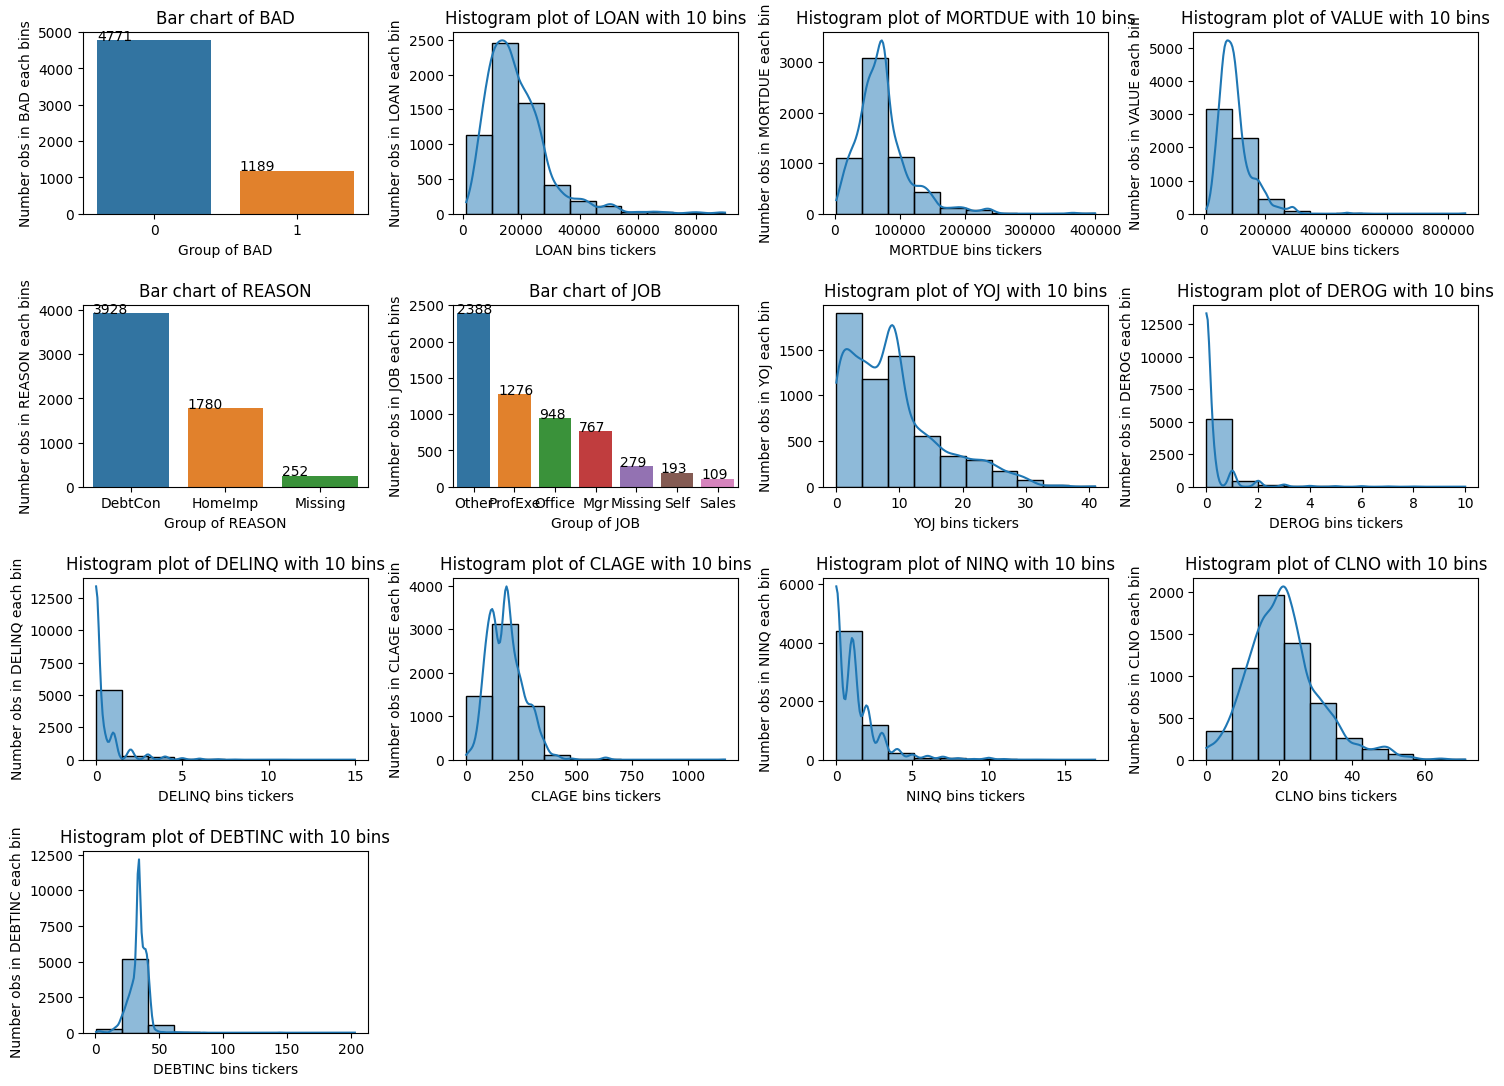

In [ ]:
#Data visualize
#Def histplot
def hist_plot (x, col_name, bins = 10):
  xlabel = '{} bins tickers'.format(col_name)
  ylabel = 'Number obs in {} each bin'.format(col_name)
  title = 'Histogram plot of {} with {} bins'.format(col_name, bins)
  ax = sns.histplot(x, bins = bins, kde = True)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  return ax
#Def bar chart
def bar_chart (x, col_name):
  xlabel = 'Group of {}'.format(col_name)
  ylabel = 'Number obs in {} each bins'.format(col_name)
  title = 'Bar chart of {}'.format(col_name)
  y_value = x.value_counts().values
  x_value = x.value_counts().index
  ax = sns.barplot(x = x_value, y = y_value, order = x_value)
  #Labels
  labels = list(set(x))
  for label, p in zip (y_value, ax.patches):
    ax.annotate(label, (p.get_x(), p.get_height()), ha='left')
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  return ax
#Visualize all columns
fig = plt.figure(figsize = (18,13))
fig.subplots_adjust(hspace = 0.5, wspace = 0.3)
for i, (col_name, dtype) in enumerate(zip(df.columns, df.dtypes.values)):
  if i <= 13:
    ax_i = fig.add_subplot(4,4,i+1)
    if dtype in ['float64', 'int64']:
      ax_i = hist_plot(df[col_name], col_name = col_name)
    else:
      ax_i = bar_chart(df[col_name], col_name = col_name)
plt.show()


*   About 20% of loans are bad
*   Most loans are less than 30000 USD with collateral about 50000 USD
*   66% number of loans are used for debt consolidation and approximately 30% of them used for home improvement
*   Most of customer has less than 10 years of working with no derogatory report and deliquent credit lines







**WOE and IV**

In [ ]:
#Divide data into bins then count the number of good/bad data in each bin
MAX_VAL = 999999999
MIN_VAL = -MAX_VAL
#Use qcut for discrete data and n_bins for continuous data
def group_bin(data, colname, n_bins = 10, qcut = None):
  X = data[[colname, 'BAD']]
  X = X.sort_values(colname)
  coltype = X[colname].dtype

  if coltype in ['float', 'int']:
    if qcut is None:
      try:
        bins, thres = pd.qcut(X[colname], q = n_bins, retbins=True)
        # Replace min, max threshold
        thres[0] = MIN_VAL
        thres[-1] = MAX_VAL
        bins, thres = pd.cut(X[colname], bins=thres, retbins=True)
        X['bins'] = bins
      except:
        print('n_bins must be lower to bin interval is valid!')
    else:
      bins, thres = pd.cut(X[colname], bins=qcut, retbins=True)
      X['bins'] = bins
  elif coltype == 'object':
    X['bins'] = X[colname]

  df_GB = pd.pivot_table(X,
                index = ['bins'],
                values = ['BAD'],
                columns = ['BAD'],
                aggfunc = {
                    'BAD':np.size
                })

  df_Count = pd.pivot_table(X,
                index = ['bins'],
                values = ['BAD'],
                aggfunc = {
                    'BAD': np.size
                })

  if coltype in ['float', 'int']:
    df_Thres = pd.DataFrame({'Thres':thres[1:]}, index=df_GB.index)
  elif coltype == 'object':
    df_Thres = pd.DataFrame(index=df_GB.index)
    thres = None
  df_Count.columns = ['No_Obs']
  df_GB.columns = ['#BAD', '#GOOD']
  df_summary = df_Thres.join(df_Count).join(df_GB)
  return df_summary, thres

In [ ]:
df_summary, thres = group_bin(df, 'DELINQ', qcut=[MIN_VAL, 2, MAX_VAL])
df_summary

,Thres,No_Obs,#BAD,#GOOD
bins,,,,
"(-999999999, 2]",2,5663,4674,989
"(2, 999999999]",999999999,297,97,200


In [ ]:
#WOE
def WOE(data, colname, n_bins = None, min_obs = 100, qcut = None):
  # Calculate bins and get the initial threshold
  df_summary, thres = group_bin(data, colname, n_bins = n_bins, qcut = qcut)
  # Replace 0 of #BAD in df_summary with 1 to avoid division by 0
  df_summary['#BAD'] = df_summary['#BAD'].replace({0:1})

  if qcut is not None:
    # Filter threshold to create new threshold with number of obs >= min_obs
    exclude_ind = np.where(df_summary['No_Obs'] <= min_obs)[0]
    if exclude_ind.shape[0] > 0:
      new_thres = np.delete(thres, exclude_ind)
      print('Auto combine {} bins into {} bins'.format(n_bins, new_thres.shape[0]-1))
      # Recalculate df_summary
      df_summary, thres = group_bin(data, colname, qcut=new_thres)

  new_thres = thres
  df_summary['GOOD/BAD'] = df_summary['#GOOD']/df_summary['#BAD']
  df_summary['%BAD'] = df_summary['#BAD']/df_summary['#BAD'].sum()
  df_summary['%GOOD'] = df_summary['#GOOD']/df_summary['#GOOD'].sum()
  df_summary['WOE'] = np.log(df_summary['%GOOD']/df_summary['%BAD'])
  df_summary['IV'] = (df_summary['%GOOD']-df_summary['%BAD'])*df_summary['WOE']
  df_summary['COLUMN'] = colname
  IV = df_summary['IV'].sum()
  print('Information Value of {} column: {}'.format(colname, IV))
  return df_summary, IV, new_thres

df_summary, IV, thres = WOE(df, 'DEBTINC', n_bins = 7, min_obs= 100)
df_summary

Information Value of DEBTINC column: 1.3795573580411762


,Thres,No_Obs,#BAD,#GOOD,GOOD/BAD,%BAD,%GOOD,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 27.028]",2.702826e+01,852,800,52,0.065000,0.167680,0.043734,-1.343925,0.166573,DEBTINC
"(27.028, 31.875]",3.187511e+01,851,808,43,0.053218,0.169357,0.036165,-1.543919,0.205637,DEBTINC
"(31.875, 33.78]",3.377992e+01,1645,835,810,0.970060,0.175016,0.681245,1.359046,0.687988,DEBTINC
"(33.78, 34.043]",3.404341e+01,58,56,2,0.035714,0.011738,0.001682,-1.942761,0.019535,DEBTINC
"(34.043, 37.18]",3.717985e+01,851,783,68,0.086845,0.164117,0.057191,-1.054182,0.112719,DEBTINC
"(37.18, 40.133]",4.013282e+01,851,804,47,0.058458,0.168518,0.039529,-1.450008,0.187035,DEBTINC
"(40.133, 999999999.0]",1.000000e+09,852,685,167,0.243796,0.143576,0.140454,-0.021982,0.000069,DEBTINC


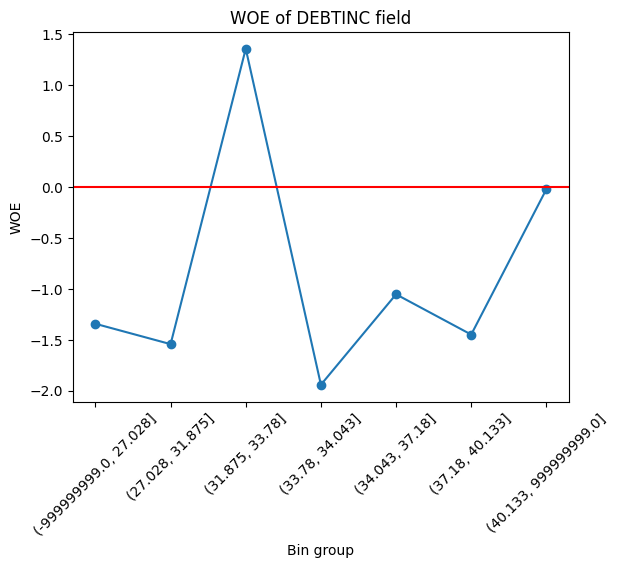

In [ ]:
#Plot WOE value of bins
def plot_WOE(df_summary):
  colname = list(df_summary['COLUMN'].unique())[0]
  df_summary['WOE'].plot(linestyle='-', marker='o')
  plt.title('WOE of {} field'.format(colname))
  plt.axhline(y=0, color = 'red')
  plt.xticks(rotation=45)
  plt.ylabel('WOE')
  plt.xlabel('Bin group')

plot_WOE(df_summary)

In [ ]:
#WOE for numeric columns (continuous data)
WOE_dict=dict()
nbins = {'LOAN': 10, 'MORTDUE': 10, 'VALUE': 10, 'YOJ':10, 'CLAGE':10, 'NINQ': 2, 'CLNO':10, 'DEBTINC':7}
for (col, bins) in nbins.items():
  df_summary, IV, thres = WOE(df, colname=col, n_bins=bins)
  WOE_dict[col] = {'table':df_summary, 'IV':IV}


Information Value of LOAN column: 0.1601563338988017
Information Value of MORTDUE column: 0.05131351983314017
Information Value of VALUE column: 0.14188912125986042
Information Value of YOJ column: 0.06714693781095009
Information Value of CLAGE column: 0.22171042878294653
Information Value of NINQ column: 0.06965935231976197
Information Value of CLNO column: 0.06043698467606807
Information Value of DEBTINC column: 1.3795573580411762


In [ ]:
#WOE for numeric columns (dicrete data)
for col in ['DEROG', 'DELINQ']:
  df_summary, IV, thres = WOE(df, colname=col, n_bins=5, qcut=[MIN_VAL, 2, MAX_VAL])
  WOE_dict[col] = {'table':df_summary, 'IV':IV}

Information Value of DEROG column: 0.19008112833205368
Information Value of DELINQ column: 0.3366699247263777


In [ ]:
#WOE for categorical columns
for col in ['REASON', 'JOB']:
  df_summary, IV, thres = WOE(df, colname=col)
  WOE_dict[col] = {'table':df_summary, 'IV':IV}

Information Value of REASON column: 0.008618460238864025
Information Value of JOB column: 0.1237305657142077


In [ ]:
#Ranking variables
columns = []
IVs = []
for col in df.columns:
  if col != 'BAD':
    columns.append(col)
    IVs.append(WOE_dict[col]['IV'])
df_WOE = pd.DataFrame({'column': columns, 'IV': IVs})

def rank_IV(iv):
  if iv <= 0.02:
    return 'Useless'
  elif iv <= 0.1:
    return 'Weak'
  elif iv <= 0.3:
    return 'Medium'
  elif iv <= 0.5:
    return 'Strong'
  else:
    return 'suspicious'

df_WOE['rank']=df_WOE['IV'].apply(lambda x: rank_IV(x))
df_WOE.sort_values('IV', ascending=False)

,column,IV,rank
11,DEBTINC,1.379557,suspicious
7,DELINQ,0.336670,Strong
8,CLAGE,0.221710,Medium
6,DEROG,0.190081,Medium
0,LOAN,0.160156,Medium
2,VALUE,0.141889,Medium
4,JOB,0.123731,Medium
9,NINQ,0.069659,Weak
5,YOJ,0.067147,Weak
10,CLNO,0.060437,Weak


'REASON' does not effective in classifying bad debt while 'DEBTINC' and 'DELINQ' are the strongest variables. Some medium affect variables are 'CLAGE', 'DEROG', 'LOAN', 'NINQ' and 'VALUE'. 'JOB', 'CLNO', 'YOJ' and ; 'MORTDUE' also has classified power but weaker.

***LOGISTIC REGRESSION *** (inputs = WOE)

In [ ]:
#Compute the WOE by mapping each bin interval to its WOE value
for col in WOE_dict.keys():
  try:
    key = list(WOE_dict[col]['table']['WOE'].index)
    woe = list(WOE_dict[col]['table']['WOE'])
    d = dict(zip(key, woe))
    col_woe = col+'_WOE'
    df[col_woe] = df[col].map(d)
  except:
    print(col)

In [ ]:
#Labeling inputs
df = df.fillna('0')
X = df.filter(like='_WOE', axis = 1)
y = df['BAD'].astype('int')

In [ ]:
#Split data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size = 0.3, stratify = y, shuffle = True, random_state = 123)


In [ ]:
#Logistic regression
lor = LogisticRegression(solver = 'lbfgs', max_iter=1000, fit_intercept=True, tol=0.0001, C=1, penalty='l2').fit(X_train, y_train)
y_lor_pred = lor.predict(X_test)
Ac_lor = accuracy_score(y_test, y_lor_pred)
F1_lor = f1_score(y_test, y_lor_pred).round(2)
ROC_lor = np.mean(cross_val_score(lor, X_train, y_train, scoring = "roc_auc"))

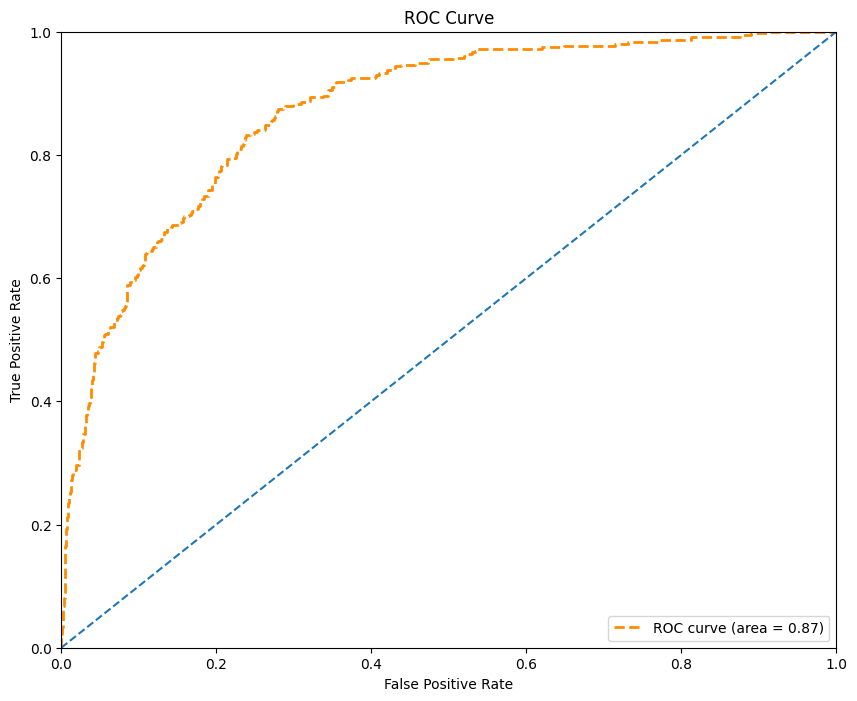

In [ ]:
#ROC curve
y_pred_prob_test = lor.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

roc_curve(fpr, tpr, thres, roc_auc)

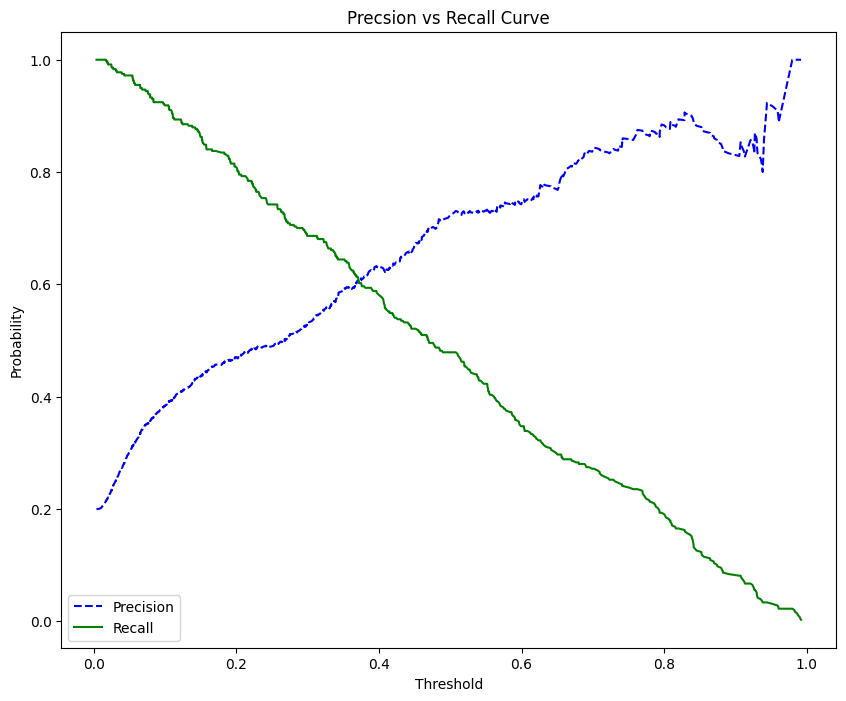

In [ ]:
#Precision Recall
precision, recall, thres = precision_recall_curve(y_test, y_pred_prob_test)
def prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

prec_rec_curve(precision, recall, thres)

**Kolmogorov-Smirnov Test**

This is a test that measures the difference in the distribution between GOOD and BAD according to threshold ratios. If the model is able to classify GOOD and BAD well, then the cumulative probability distribution function (cdf) between GOOD and BAD must have a large separation. On the contrary, if the model is very weak and its prediction result is only equal to a random selection. Then the cumulative probability distribution of GOOD and BAD will be close to each other and asymptotically 45 degrees diagonal. The Kolmogorov-Smirnov test will test the hypothesis that Ho is two probability distributions GOOD and BAD have no difference. When P-value < 0.05, the null hypothesis is rejected.

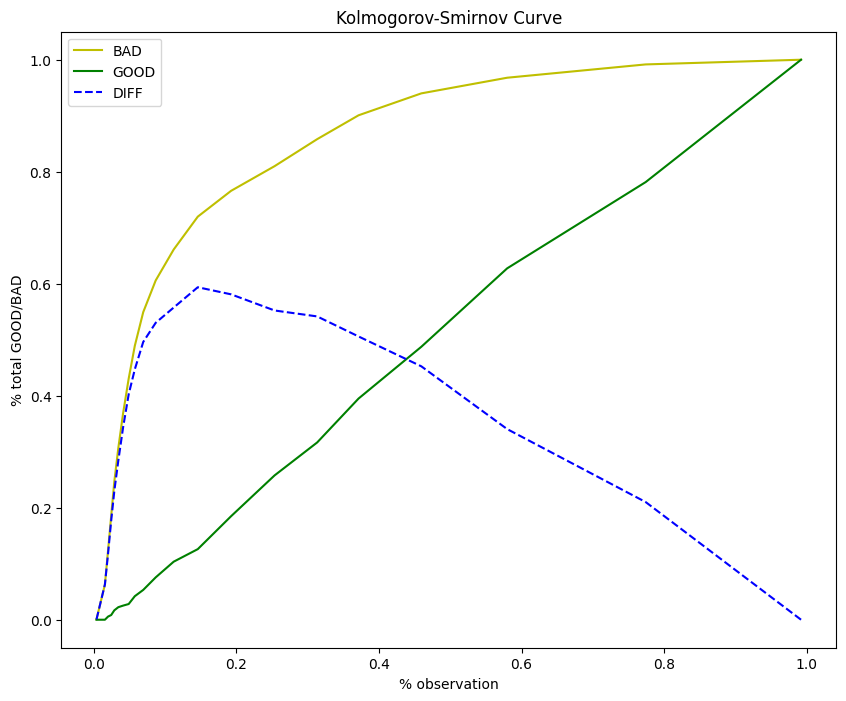

In [ ]:
def KM(y_pred, n_bins):
  _, thresholds = pd.qcut(y_pred, q=n_bins, retbins=True)
  cmd_BAD = []
  cmd_GOOD = []
  BAD_id = set(np.where(y_test == 0)[0])
  GOOD_id = set(np.where(y_test == 1)[0])
  total_BAD = len(BAD_id)
  total_GOOD = len(GOOD_id)
  for thres in thresholds:
    pred_id = set(np.where(y_pred <= thres)[0])
    # Percentage of BAD loans which have probability <= thres
    per_BAD = len(pred_id.intersection(BAD_id))/total_BAD
    cmd_BAD.append(per_BAD)
    # Percentage of BAD loans which have probability <= thres
    per_GOOD = len(pred_id.intersection(GOOD_id))/total_GOOD
    cmd_GOOD.append(per_GOOD)
  cmd_BAD = np.array(cmd_BAD)
  cmd_GOOD = np.array(cmd_GOOD)
  return cmd_BAD, cmd_GOOD, thresholds

cmd_BAD, cmd_GOOD, thresholds = KM(y_pred_prob_test, n_bins=20)

def plot_KM(cmd_BAD, cmd_GOOD, thresholds):
  plt.figure(figsize = (10, 8))
  plt.plot(thresholds, cmd_BAD, 'y-', label = 'BAD')
  plt.plot(thresholds, cmd_GOOD, 'g-', label = 'GOOD')
  plt.plot(thresholds, cmd_BAD-cmd_GOOD, 'b--', label = 'DIFF')
  plt.xlabel('% observation')
  plt.ylabel('% total GOOD/BAD')
  plt.title('Kolmogorov-Smirnov Curve')
  plt.legend()

plot_KM(cmd_BAD, cmd_GOOD, thresholds)

In [ ]:
#Kolmogorov-Smirnov Test Value
from scipy import stats

stats.ks_2samp(cmd_BAD, cmd_GOOD)


KstestResult(statistic=0.5238095238095238, pvalue=0.005467427576534314, statistic_location=0.18487394957983194, statistic_sign=-1)

**p-value < 0.05 => cdf of BAD and GOOD are signifincant => Logistic regression model is good**

# **Credit scoring for each features**

In [ ]:
def CreditScore(beta, alpha, woe, n = 12, odds = 1/4, pdo = -60, thres_score = 600):
  factor = pdo/np.log(2)
  offset = thres_score - factor*np.log(odds)
  score = (beta*woe+alpha/n)*factor+offset/n
  return score

CreditScore(beta = 0.5, alpha = -1, woe = 0.15, n = 12)

40.72134752044448

In [ ]:
#Find beta and alpha in logistic regression
betas_dict = dict(zip(list(X_train.columns), lor.coef_[0]))
alpha = lor.intercept_[0]
betas_dict

{'LOAN_WOE': 0.5439480799431258,
 'MORTDUE_WOE': 0.6159617658313736,
 'VALUE_WOE': 0.7361564556892625,
 'YOJ_WOE': 0.8547227776923044,
 'CLAGE_WOE': 0.8241395111645823,
 'NINQ_WOE': 0.6093735525800076,
 'CLNO_WOE': 0.779811035908772,
 'DEBTINC_WOE': 0.9385004373994016,
 'DEROG_WOE': 0.9294458242565481,
 'DELINQ_WOE': 1.0051628091506397,
 'REASON_WOE': 0.38156526111567257,
 'JOB_WOE': 0.9513838050794072}

In [ ]:
cols = []
features = []
woes = []
betas = []
scores = []

for col in columns:
  for feature, woe in WOE_dict[col]['table']['WOE'].to_frame().iterrows():
      cols.append(col)
      # Add feature
      feature = str(feature)
      features.append(feature)
      # Add woe
      woe = woe.values[0]
      woes.append(woe)
      # Add beta
      col_woe = col+'_WOE'
      beta = betas_dict[col_woe]
      betas.append(beta)
      # Add score
      score = CreditScore(beta = beta, alpha = alpha, woe = woe, n = 12)
      scores.append(score)

df_WOE = pd.DataFrame({'Columns': cols, 'Features': features, 'WOE': woes, 'Betas':betas, 'Scores':scores})
df_WOE.head()

,Columns,Features,WOE,Betas,Scores
0,LOAN,"(-999999999.0, 7600.0]",0.898910,0.543948,7.589879
1,LOAN,"(7600.0, 10000.0]",0.154566,0.543948,42.637340
2,LOAN,"(10000.0, 12100.0]",-0.112535,0.543948,55.213838
3,LOAN,"(12100.0, 14400.0]",-0.158318,0.543948,57.369513
4,LOAN,"(14400.0, 16300.0]",0.162082,0.543948,42.283453


Example: Calculate a random credit score

In [ ]:
test_obs = df[columns].iloc[0:1, :]
test_obs

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915


In [ ]:
def search_score(obs, col):
  feature = [str(inter) for inter in list(WOE_dict[col]['table'].index) if obs[col].values[0] in inter][0]
  score = df_WOE[(df_WOE['Columns'] == col) & (df_WOE['Features'] == feature)]['Scores'].values[0]
  return score

# Scoring for 'LOAN' term of the obs
score = search_score(test_obs, 'LOAN')
score

7.58987873282949

In [ ]:
def total_score(obs, columns = columns):
  scores = dict()
  for col in columns:
    scores[col] = search_score(obs, col)
  total_score = sum(scores.values())
  return scores, total_score



In [ ]:
scores, total_score = total_score(test_obs)
print('score for each fields: \n', scores)
print('final total score: ', total_score)

score for each fields: 
 {'LOAN': 7.58987873282949, 'MORTDUE': 28.37460412381987, 'VALUE': 9.7623569756805, 'REASON': 45.352996033140855, 'JOB': 34.07414569410065, 'YOJ': 42.94493279677645, 'DEROG': 56.203488724212946, 'DELINQ': 64.15256582044003, 'CLAGE': 22.308728101795943, 'NINQ': 61.03029423293192, 'CLNO': 17.22605460330079, 'DEBTINC': -60.491333291808914}
final total score:  328.52871254722055


In [ ]:
total_scores = []
for i in np.arange(df[columns].shape[0]):
  obs = df[columns].iloc[i:(i+1), :]
  _, score = total_score(obs)
  total_scores.append(score)
df['Score'] = total_scores

Text(0.5, 1.0, 'Distribution Score of Total data')

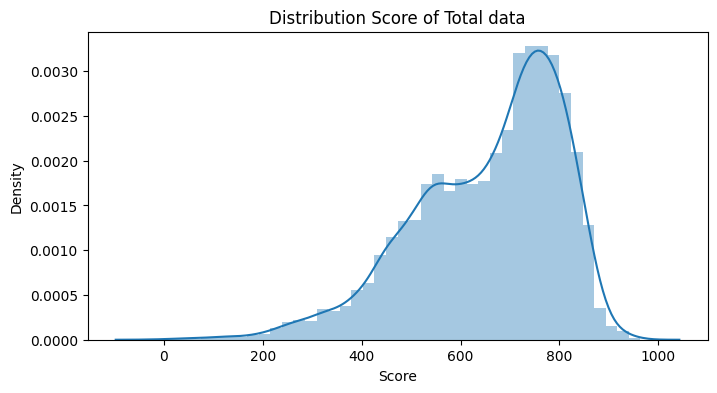

In [ ]:
df[['BAD']] = df[['BAD']].astype('int')
plt.figure(figsize=(8, 4))
sns.distplot(df['Score'])
plt.title('Distribution Score of Total data')


Text(0.5, 1.0, 'Distribution Score in Default vs Non-Default')

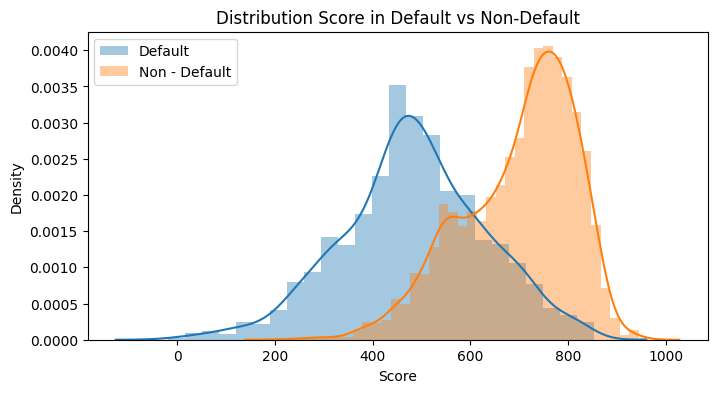

In [ ]:
plt.figure(figsize=(8, 4))
sns.distplot(df[df['BAD']==1]['Score'], label = 'Default')
sns.distplot(df[df['BAD']==0]['Score'], label = 'Non - Default')
plt.legend(loc = 'best')
plt.title('Distribution Score in Default vs Non-Default')
